In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

#from pandas import read_html

import pandas as pd

In [2]:
data = pd.read_csv("US_population.csv",index_col ='year')
pop = data.population /1e6

year
1900     76.094000
1901     77.584000
1902     79.163000
1903     80.632000
1904     82.166000
1905     83.822000
1906     85.450000
1907     87.008000
1908     88.710000
1909     90.490000
1910     92.407000
1911     93.863000
1912     95.335000
1913     97.225000
1914     99.111000
1915    100.546000
1916    101.961000
1917    103.268000
1918    103.208000
1919    104.514000
1920    106.461000
1921    108.538000
1922    110.049000
1923    111.947000
1924    114.109000
1925    115.829000
1926    117.397000
1927    119.035000
1928    120.509000
1929    121.767000
           ...    
1987    242.288918
1988    244.498982
1989    246.819230
1990    249.622814
1991    252.980941
1992    256.514224
1993    259.918588
1994    263.125821
1995    266.278393
1996    269.394284
1997    272.646925
1998    275.854104
1999    279.040168
2000    282.162411
2001    284.968955
2002    287.625193
2003    290.107933
2004    292.805298
2005    295.516599
2006    298.379912
2007    301.231207
2008   

In [3]:
pop [1900]

76.094

Saving figure to file proj01-fig01.png


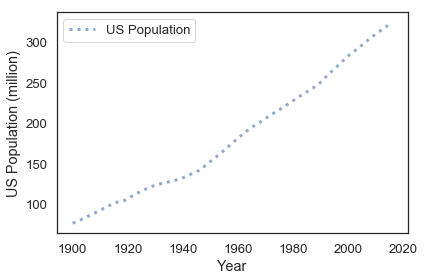

In [4]:
plot (pop,':', label ='US Population')
decorate(xlabel='Year',
        ylabel='US Population (million)')
savefig('proj01-fig01.png')

In [41]:
t_0 = get_first_label(pop)
t_gd_start = 1928
t_gd_end = 1941
t_agd_start = t_gd_end + 1
t_end = get_last_label(pop)

2016

In [46]:
elapsed_time_bgd = t_gd_start - t_0
p_0 =  pop[t_0]
p_gd_start = pop[t_gd_start]
deltap_bgd = p_gd_start - p_0
growth_rate_bgd = deltap_bgd/elapsed_time_bgd

1.5862500000000002

In [47]:
elapsed_time_agd = t_end - t_agd_start
p_agd_start = pop[t_agd_start]
p_end = pop[t_end]
deltap_agd = p_end - p_agd_start
growth_rate_agd = deltap_agd/elapsed_time_agd

2.554463527027027

In [48]:
pop_pre_gd = pop [(pop.index >= t_0) & (pop.index <= t_gd_start -1)]

year
1900     76.094
1901     77.584
1902     79.163
1903     80.632
1904     82.166
1905     83.822
1906     85.450
1907     87.008
1908     88.710
1909     90.490
1910     92.407
1911     93.863
1912     95.335
1913     97.225
1914     99.111
1915    100.546
1916    101.961
1917    103.268
1918    103.208
1919    104.514
1920    106.461
1921    108.538
1922    110.049
1923    111.947
1924    114.109
1925    115.829
1926    117.397
1927    119.035
Name: population, dtype: float64

In [55]:
system = System(t_0 = t_0,
                t_gd_start = t_gd_start,
                t_gd_end = t_gd_end,
                t_agd_start = t_agd_start,
                t_end = t_end,
                p_gd_start = p_gd_start,
                growth_rate_bgd = growth_rate_bgd,
                growth_rate_agd = growth_rate_agd)

,values
t_0,1900.000000
t_gd_start,1928.000000
t_gd_end,1941.000000
t_agd_start,1942.000000
t_end,2016.000000
p_gd_start,120.509000
growth_rate_bgd,1.586250
growth_rate_agd,2.554464


In [60]:
def run_simulation (system, update_func):
    results = TimeSeries()
    results[system.t_gd_start] = system.p_gd_start
    
    for t in linrange(system.t_gd_start, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [61]:
def update_func_gd (pop,t,system):
    if t <= t_gd_end:
        return pop + system.growth_rate_bgd
    else:
        return pop + system.growth_rate_agd

gd_results = run_simulation (system, update_func_gd)

,values
1928,120.509000
1929,122.095250
1930,123.681500
1931,125.267750
1932,126.854000
1933,128.440250
1934,130.026500
1935,131.612750
1936,133.199000
1937,134.785250


In [62]:
results_thru_gd = pop_pre_gd.append(gd_results)

1900     76.094000
1901     77.584000
1902     79.163000
1903     80.632000
1904     82.166000
1905     83.822000
1906     85.450000
1907     87.008000
1908     88.710000
1909     90.490000
1910     92.407000
1911     93.863000
1912     95.335000
1913     97.225000
1914     99.111000
1915    100.546000
1916    101.961000
1917    103.268000
1918    103.208000
1919    104.514000
1920    106.461000
1921    108.538000
1922    110.049000
1923    111.947000
1924    114.109000
1925    115.829000
1926    117.397000
1927    119.035000
1928    120.509000
1929    122.095250
           ...    
1987    257.667359
1988    260.221822
1989    262.776286
1990    265.330749
1991    267.885213
1992    270.439676
1993    272.994140
1994    275.548603
1995    278.103067
1996    280.657530
1997    283.211994
1998    285.766458
1999    288.320921
2000    290.875385
2001    293.429848
2002    295.984312
2003    298.538775
2004    301.093239
2005    303.647702
2006    306.202166
2007    308.756629
2008    311.

Saving figure to file proj01-fig02.png


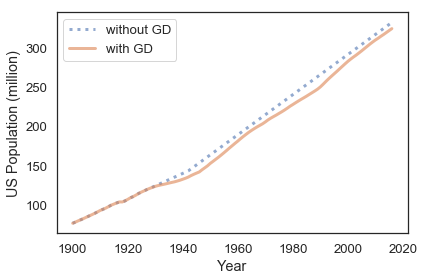

In [65]:
plot (results_thru_gd, ':',label = "without GD")
plot(pop, '-', label = "with GD")
decorate(xlabel='Year',
        ylabel='US Population (million)')
savefig('proj01-fig02.png')

In [25]:
pop_post_gd = pop[(pop.index >= t_norm_start) & (pop.index <= t_norm_end)]

year
1942    134.859553
1943    136.739353
1944    138.397345
1945    139.928165
1946    141.388566
1947    144.126071
1948    146.631302
1949    149.188130
1950    152.271417
1951    154.877889
1952    157.552740
1953    160.184192
1954    163.025854
1955    165.931202
1956    168.903031
1957    171.984130
1958    174.881904
1959    177.829628
1960    180.671158
1961    183.691481
1962    186.537737
1963    189.241798
1964    191.888791
1965    194.302963
1966    196.560338
1967    198.712056
1968    200.706052
1969    202.676946
1970    205.052174
1971    207.660677
           ...    
1987    242.288918
1988    244.498982
1989    246.819230
1990    249.622814
1991    252.980941
1992    256.514224
1993    259.918588
1994    263.125821
1995    266.278393
1996    269.394284
1997    272.646925
1998    275.854104
1999    279.040168
2000    282.162411
2001    284.968955
2002    287.625193
2003    290.107933
2004    292.805298
2005    295.516599
2006    298.379912
2007    301.231207
2008   

In [26]:
total_pop = results_thru_gd.append(pop_post_gd)

1900     76.094000
1901     77.584000
1902     79.163000
1903     80.632000
1904     82.166000
1905     83.822000
1906     85.450000
1907     87.008000
1908     88.710000
1909     90.490000
1910     92.407000
1911     93.863000
1912     95.335000
1913     97.225000
1914     99.111000
1915    100.546000
1916    101.961000
1917    103.268000
1918    103.208000
1919    104.514000
1920    106.461000
1921    108.538000
1922    110.049000
1923    111.947000
1924    114.109000
1925    115.829000
1926    117.397000
1927    119.035000
1928    120.509000
1929    122.095250
           ...    
1987    242.288918
1988    244.498982
1989    246.819230
1990    249.622814
1991    252.980941
1992    256.514224
1993    259.918588
1994    263.125821
1995    266.278393
1996    269.394284
1997    272.646925
1998    275.854104
1999    279.040168
2000    282.162411
2001    284.968955
2002    287.625193
2003    290.107933
2004    292.805298
2005    295.516599
2006    298.379912
2007    301.231207
2008    304.

Saving figure to file proj01-fig03.png


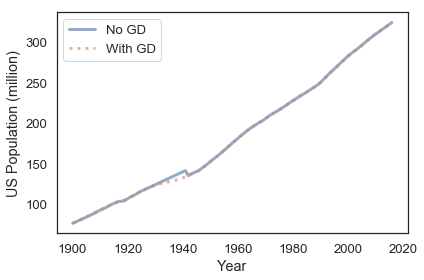

In [31]:
plot (total_pop, '-',label = "No GD")
plot(pop, ':', label='With GD')
decorate(xlabel='Year',
        ylabel='US Population (million)')
savefig('proj01-fig03.png')

year
1900     76.094000
1901     77.584000
1902     79.163000
1903     80.632000
1904     82.166000
1905     83.822000
1906     85.450000
1907     87.008000
1908     88.710000
1909     90.490000
1910     92.407000
1911     93.863000
1912     95.335000
1913     97.225000
1914     99.111000
1915    100.546000
1916    101.961000
1917    103.268000
1918    103.208000
1919    104.514000
1920    106.461000
1921    108.538000
1922    110.049000
1923    111.947000
1924    114.109000
1925    115.829000
1926    117.397000
1927    119.035000
1928    120.509000
1929    121.767000
           ...    
1987    242.288918
1988    244.498982
1989    246.819230
1990    249.622814
1991    252.980941
1992    256.514224
1993    259.918588
1994    263.125821
1995    266.278393
1996    269.394284
1997    272.646925
1998    275.854104
1999    279.040168
2000    282.162411
2001    284.968955
2002    287.625193
2003    290.107933
2004    292.805298
2005    295.516599
2006    298.379912
2007    301.231207
2008   